In [1]:
import os

# Set your dataset path
dataset_path = r"D:\Downloads\train_balanced_200"

# Dictionary to hold class counts
class_counts = {}

# Loop through each class folder
for cls in os.listdir(dataset_path):
    cls_path = os.path.join(dataset_path, cls)
    if os.path.isdir(cls_path):
        num_images = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
        class_counts[cls] = num_images

# Display the class info
print("Number of classes:", len(class_counts))
for cls, count in class_counts.items():
    print(f"Class: {cls:20s} --> {count} images")


Number of classes: 80
Class: Bear                 --> 87 images
Class: Brown bear           --> 108 images
Class: Butterfly            --> 200 images
Class: Camel                --> 67 images
Class: Canary               --> 113 images
Class: Caterpillar          --> 200 images
Class: Cats                 --> 200 images
Class: Cattle               --> 70 images
Class: Centipede            --> 194 images
Class: Cheetah              --> 132 images
Class: Chicken              --> 200 images
Class: Crab                 --> 200 images
Class: Crocodile            --> 108 images
Class: Deer                 --> 200 images
Class: Dogs                 --> 200 images
Class: Duck                 --> 200 images
Class: Eagle                --> 200 images
Class: Elephant             --> 155 images
Class: Fish                 --> 200 images
Class: Fox                  --> 148 images
Class: Frog                 --> 200 images
Class: Giraffe              --> 200 images
Class: Goat                 --> 200

In [3]:
import os
import random
import shutil
import math

# Paths
source_dir = r"D:\Downloads\train_balanced_200"
target_dir = r"D:\Downloads\train_balanced_200\Wildlife_Balanced"
samples_per_class = 256  # Final count per class

# Make sure target directory exists
os.makedirs(target_dir, exist_ok=True)

# Loop through each class
for cls in os.listdir(source_dir):
    cls_path = os.path.join(source_dir, cls)
    if os.path.isdir(cls_path):
        images = [img for img in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, img))]
        
        if len(images) == 0:
            print(f"⚠ Skipping empty folder: {cls}")
            continue
        
        if len(images) < samples_per_class:
            # Oversample: repeat images until reaching the target count
            multiplier = math.ceil(samples_per_class / len(images))
            images_extended = (images * multiplier)[:samples_per_class]
        else:
            # Randomly select without replacement
            images_extended = random.sample(images, samples_per_class)
        
        # Create class folder in target
        target_class_path = os.path.join(target_dir, cls)
        os.makedirs(target_class_path, exist_ok=True)

        # Copy files with unique names to avoid overwriting
        for idx, img in enumerate(images_extended):
            src_path = os.path.join(cls_path, img)
            new_name = f"{idx}_{img}"
            dst_path = os.path.join(target_class_path, new_name)
            shutil.copy2(src_path, dst_path)
        
        print(f"✅ {cls}: {len(images_extended)} images copied.")

print("\n🎯 Balanced dataset created successfully!")


✅ Bear: 256 images copied.
✅ Brown bear: 256 images copied.
✅ Butterfly: 256 images copied.
✅ Camel: 256 images copied.
✅ Canary: 256 images copied.
✅ Caterpillar: 256 images copied.
✅ Cats: 256 images copied.
✅ Cattle: 256 images copied.
✅ Centipede: 256 images copied.
✅ Cheetah: 256 images copied.
✅ Chicken: 256 images copied.
✅ Crab: 256 images copied.
✅ Crocodile: 256 images copied.
✅ Deer: 256 images copied.
✅ Dogs: 256 images copied.
✅ Duck: 256 images copied.
✅ Eagle: 256 images copied.
✅ Elephant: 256 images copied.
✅ Fish: 256 images copied.
✅ Fox: 256 images copied.
✅ Frog: 256 images copied.
✅ Giraffe: 256 images copied.
✅ Goat: 256 images copied.
✅ Goldfish: 256 images copied.
✅ Goose: 256 images copied.
✅ Hamster: 256 images copied.
✅ Harbor seal: 256 images copied.
✅ Hedgehog: 256 images copied.
✅ Hippopotamus: 256 images copied.
✅ Horse: 256 images copied.
✅ Jaguar: 256 images copied.
✅ Jellyfish: 256 images copied.
✅ Kangaroo: 256 images copied.
✅ Koala: 256 images copi

In [13]:
import os
import random
import shutil
import math

# Paths
source_dir = r"D:\Downloads\train_balanced_200"
extra_dir = r"D:\Downloads\Wildlife_dataset\images\species_train"
target_dir = r"D:\Downloads\train_balanced_200\Wildlife_Balanced_merged_one"
samples_per_class = 256  # Target per class

os.makedirs(target_dir, exist_ok=True)

# Get all class names from both datasets
all_classes = set(os.listdir(source_dir)) | set(os.listdir(extra_dir))

for cls in all_classes:
    images = []

    # Collect images from source dataset
    src_path = os.path.join(source_dir, cls)
    if os.path.isdir(src_path):
        images.extend([os.path.join(src_path, img) for img in os.listdir(src_path) if os.path.isfile(os.path.join(src_path, img))])

    # Collect images from extra dataset
    extra_path = os.path.join(extra_dir, cls)
    if os.path.isdir(extra_path):
        images.extend([os.path.join(extra_path, img) for img in os.listdir(extra_path) if os.path.isfile(os.path.join(extra_path, img))])

    if not images:
        print(f"⚠ Skipping class '{cls}' (no images found).")
        continue

    # Balancing logic
    if len(images) < samples_per_class:
        multiplier = math.ceil(samples_per_class / len(images))
        images_extended = (images * multiplier)[:samples_per_class]
    else:
        images_extended = random.sample(images, samples_per_class)

    # Create class folder in target
    target_class_path = os.path.join(target_dir, cls)
    os.makedirs(target_class_path, exist_ok=True)

    # Copy with unique names
    for idx, img_path in enumerate(images_extended):
        img_name = os.path.basename(img_path)
        new_name = f"{idx}_{img_name}"
        shutil.copy2(img_path, os.path.join(target_class_path, new_name))

    print(f"✅ {cls}: {len(images_extended)} images copied (original: {len(images)})")

print("\n🎯 Dataset merged and balanced successfully!")


✅ elephas_maximus: 256 images copied (original: 173)
✅ Jellyfish: 256 images copied (original: 200)
✅ Parrot: 256 images copied (original: 200)
✅ Crab: 256 images copied (original: 200)
✅ Owl: 256 images copied (original: 200)
✅ Spider: 256 images copied (original: 200)
✅ Harbor seal: 256 images copied (original: 200)
✅ Raccoon: 256 images copied (original: 103)
✅ Elephant: 256 images copied (original: 155)
✅ Mule: 256 images copied (original: 61)
✅ Zebra: 256 images copied (original: 181)
✅ Canary: 256 images copied (original: 113)
✅ Butterfly: 256 images copied (original: 200)
✅ Sheep: 256 images copied (original: 99)
✅ leopardus_braccatus: 256 images copied (original: 4)
✅ Woodpecker: 256 images copied (original: 171)
✅ Leopard: 256 images copied (original: 123)
✅ leopardus_emiliae: 256 images copied (original: 5)
✅ Caterpillar: 256 images copied (original: 200)
✅ Dogs: 256 images copied (original: 200)
✅ leopardus_wiedii: 256 images copied (original: 180)
✅ Chicken: 256 images copi

In [4]:
import os
import random
import shutil

dataset_dir = r"D:\Downloads\train_balanced_200\Wildlife_Balanced_merged"
output_dir = r"D:\Downloads\Split_dataset"  # moved outside source folder

train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

os.makedirs(output_dir, exist_ok=True)
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

for cls in os.listdir(dataset_dir):
    cls_path = os.path.join(dataset_dir, cls)

    # Skip if not a folder or is the output folder itself
    if not os.path.isdir(cls_path) or cls.lower() == "split_dataset":
        continue

    images = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
    random.shuffle(images)

    n_total = len(images)
    n_train = int(train_ratio * n_total)
    n_val = int(val_ratio * n_total)

    splits = {
        'train': images[:n_train],
        'val': images[n_train:n_train + n_val],
        'test': images[n_train + n_val:]
    }

    for split, split_images in splits.items():
        split_cls_dir = os.path.join(output_dir, split, cls)
        os.makedirs(split_cls_dir, exist_ok=True)
        for img in split_images:
            shutil.copy2(os.path.join(cls_path, img), os.path.join(split_cls_dir, img))

    print(f"✅ {cls}: {n_total} → Train:{n_train}, Val:{n_val}, Test:{len(images)-n_train-n_val}")

print("\n🎯 Dataset split into train/val/test successfully!")


✅ acinonyx_jubatus: 256 → Train:179, Val:51, Test:26
✅ Bear: 256 → Train:179, Val:51, Test:26
✅ Brown bear: 256 → Train:179, Val:51, Test:26
✅ Butterfly: 256 → Train:179, Val:51, Test:26
✅ Camel: 256 → Train:179, Val:51, Test:26
✅ Canary: 256 → Train:179, Val:51, Test:26
✅ caracal_aurata: 256 → Train:179, Val:51, Test:26
✅ caracal_caracal: 256 → Train:179, Val:51, Test:26
✅ Caterpillar: 256 → Train:179, Val:51, Test:26
✅ catopuma_temminckii: 256 → Train:179, Val:51, Test:26
✅ Cats: 256 → Train:179, Val:51, Test:26
✅ Cattle: 256 → Train:179, Val:51, Test:26
✅ Centipede: 256 → Train:179, Val:51, Test:26
✅ Cheetah: 256 → Train:179, Val:51, Test:26
✅ Chicken: 256 → Train:179, Val:51, Test:26
✅ Crab: 256 → Train:179, Val:51, Test:26
✅ Crocodile: 256 → Train:179, Val:51, Test:26
✅ Deer: 256 → Train:179, Val:51, Test:26
✅ Dogs: 256 → Train:179, Val:51, Test:26
✅ Duck: 256 → Train:179, Val:51, Test:26
✅ Eagle: 256 → Train:179, Val:51, Test:26
✅ Elephant: 256 → Train:179, Val:51, Test:26
✅ elep

In [9]:
%pip install torch torchvision torchaudio


^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import os
import random
import shutil
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_dir = r"D:\Downloads\Split_dataset"

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transform)
val_data = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=test_transform)
test_data = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=test_transform)

train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=4, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

print(f"Classes: {train_data.classes}")
print(f"Train size: {len(train_data)}, Val size: {len(val_data)}, Test size: {len(test_data)}")


Classes: ['Bear', 'Brown bear', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cats', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Dogs', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths and butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar bear', 'Rabbit', 'Raccoon', 'Raven', 'Rhinoceros', 'Scorpion', 'Sea lion', 'Sea turtle', 'Shark', 'Sheep', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Whale', 'Woodpecker', 'Worm', 'Zebra', 'acinonyx_jubatus', 'caracal_aurata', 'caracal_caracal', 'catopuma_temminckii', 'elephas_maximus', 'felis_chaus', 'felis_lybica', 'felis_margarita', 'felis_nigripes', 'felis_silvestris', 'herpai

In [2]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load pretrained ResNet101
model = models.resnet101(pretrained=True)

# Freeze early layers (optional for faster training)
for param in model.parameters():
    param.requires_grad = False

# Replace final layer for your dataset
num_classes = len(train_data.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


Using device: cpu


c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [28]:
%pip install tqdm


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Shashank S M\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [ ]:
from tqdm import tqdm

epochs = 20
best_val_acc = 0.0

for epoch in range(epochs):
    model.train()
    train_loss, train_correct = 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        train_correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = train_correct / len(train_data)

    # Validation
    model.eval()
    val_correct, val_loss = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            val_correct += (outputs.argmax(1) == labels).sum().item()

    val_acc = val_correct / len(val_data)

    print(f"Epoch [{epoch+1}/{epochs}] | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_resnet101.pth")
        print("💾 Best model saved!")


Epoch 1/20 - Training: 100%|██████████| 6478/6478 [3:06:29<00:00,  1.73s/it]  


Epoch [1/20] | Train Acc: 0.4636 | Val Acc: 0.5983
💾 Best model saved!


Epoch 2/20 - Training: 100%|██████████| 6478/6478 [2:31:49<00:00,  1.41s/it]  


Epoch [2/20] | Train Acc: 0.5867 | Val Acc: 0.6389
💾 Best model saved!


Epoch 3/20 - Training: 100%|██████████| 6478/6478 [2:54:55<00:00,  1.62s/it]  


Epoch [3/20] | Train Acc: 0.6123 | Val Acc: 0.7422
💾 Best model saved!


Epoch 4/20 - Training: 100%|██████████| 6478/6478 [2:53:42<00:00,  1.61s/it]  


Epoch [4/20] | Train Acc: 0.6321 | Val Acc: 0.7102


Epoch 5/20 - Training: 100%|██████████| 6478/6478 [3:15:39<00:00,  1.81s/it]  


Epoch [5/20] | Train Acc: 0.6437 | Val Acc: 0.7091


Epoch 6/20 - Training: 100%|██████████| 6478/6478 [3:15:40<00:00,  1.81s/it]  


Epoch [6/20] | Train Acc: 0.6525 | Val Acc: 0.6794


Epoch 7/20 - Training:   0%|          | 25/6478 [00:53<3:20:12,  1.86s/it]

In [5]:
# Load best model
model.load_state_dict(torch.load("best_resnet101.pth"))
model.eval()

test_correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        test_correct += (outputs.argmax(1) == labels).sum().item()

test_acc = test_correct / len(test_data)
print(f"🎯 Test Accuracy: {test_acc:.4f}")


🎯 Test Accuracy: 0.7434


In [4]:
import torch
import torch.nn as nn
from torchvision.models import resnet101, ResNet101_Weights

# Load pretrained model architecture
weights = ResNet101_Weights.IMAGENET1K_V2
model = resnet101(weights=weights)

# Modify classifier head (must match training)
num_classes =  len(train_data.classes)  # same number of species you trained on
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load trained weights
model.load_state_dict(torch.load("best_resnet101NEW.pth", map_location="cpu"))
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision import transforms
from PIL import Image

# Same as val_tfms in training
val_tfms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load and preprocess
img_path = r"D:\Downloads\Split_dataset\test\Zebra\5_0479cada52eb3410.jpg"# 🔹 replace with your test image
img = Image.open(img_path).convert("RGB")
x = val_tfms(img).unsqueeze(0)  # add batch dimension


In [6]:
import torch.nn.functional as F

with torch.no_grad():
    outputs = model(x)
    probs = F.softmax(outputs, dim=1)
    conf, pred_class = torch.max(probs, 1)

print(f"Predicted: {train_data.classes[pred_class.item()]}, Confidence: {conf.item():.4f}")


Predicted: Zebra, Confidence: 1.0000


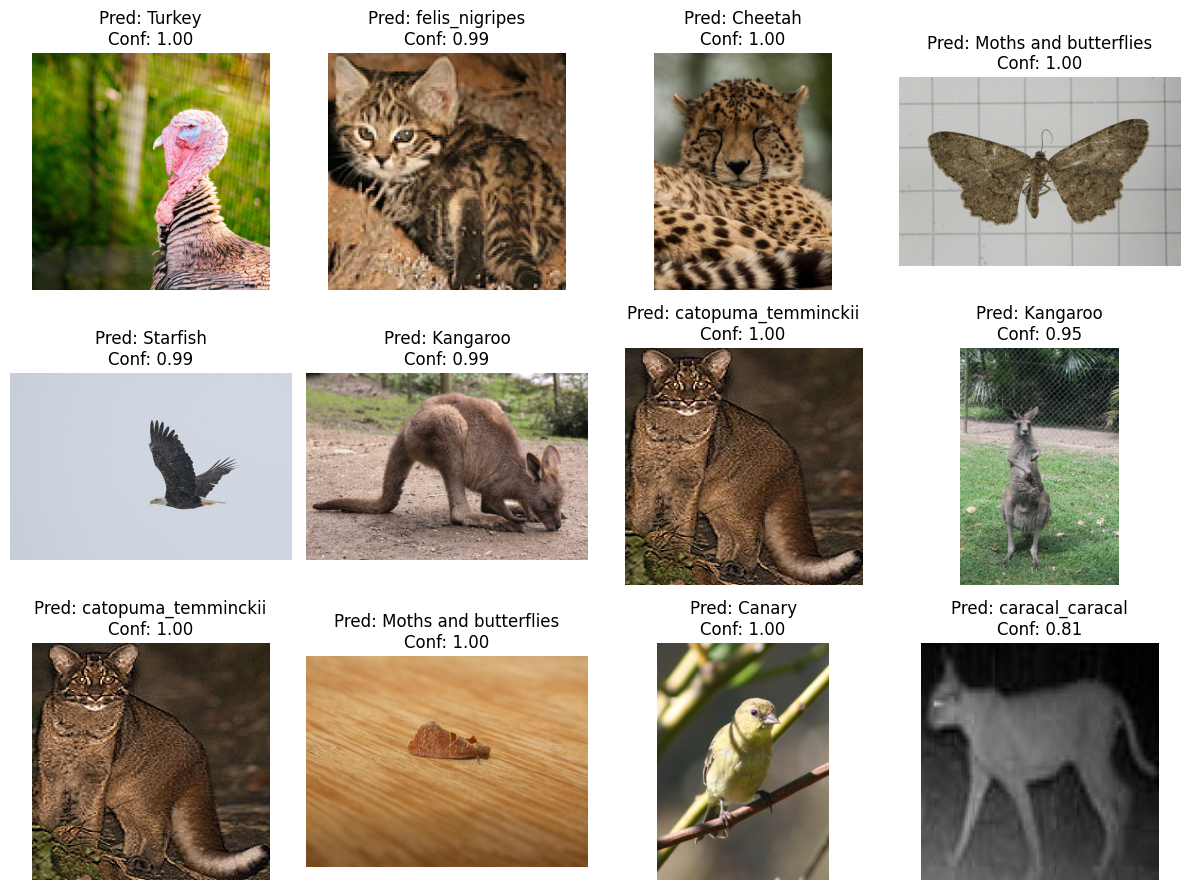

In [8]:
%matplotlib inline
import os, glob, random
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
import math

# Path to test dataset (root folder containing class subfolders)
test_folder = r"D:\Downloads\Split_dataset\test"

# Get all image paths
image_files = glob.glob(os.path.join(test_folder, "*", "*.jpg"))

# 🔹 Number of images to display
num_images = 12   # change as you like

# 🔹 Number of columns in the grid
cols = 4          # more columns = more images in a row

# Pick random images
sample_images = random.sample(image_files, num_images)

# 🔹 Rows will adjust automatically
rows = math.ceil(num_images / cols)
plt.figure(figsize=(3 * cols, 3 * rows))  # dynamic figure size

for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("RGB")
    x = val_tfms(img).unsqueeze(0)  # preprocess

    with torch.no_grad():
        outputs = model(x)
        probs = F.softmax(outputs, dim=1)
        conf, pred_class = torch.max(probs, 1)

    pred_label = train_data.classes[pred_class.item()]

    plt.subplot(rows, cols, i+1)  # rows x cols grid
    plt.imshow(img)
    plt.title(f"Pred: {pred_label}\nConf: {conf.item():.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\shashank s m\appdata\local\programs\python\python313\lib\site-packages (0.13.2)

Using device: cpu


c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


=== OVERALL METRICS ===
Test Accuracy: 0.1571 (15.71%)
Macro Precision: 0.1660 (16.60%)
Macro Recall: 0.1509 (15.09%)
Macro F1-Score: 0.1483 (14.83%)


=== DETAILED CLASSIFICATION REPORT ===
                          precision    recall  f1-score   support

                    Bear       0.93      0.75      0.83       106
              Brown bear       0.81      0.80      0.80       104
               Butterfly       0.43      0.77      0.55       110
                   Camel       0.89      0.73      0.80       113
                  Canary       0.57      0.77      0.66       105
             Caterpillar       0.94      0.16      0.28       105
                    Cats       0.85      0.84      0.84       106
                  Cattle       0.63      0.58      0.60       104
               Centipede       0.46      0.63      0.53       109
                 Cheetah       0.64      0.71      0.67       109
                 Chicken       0.57      0.78      0.66        99
                

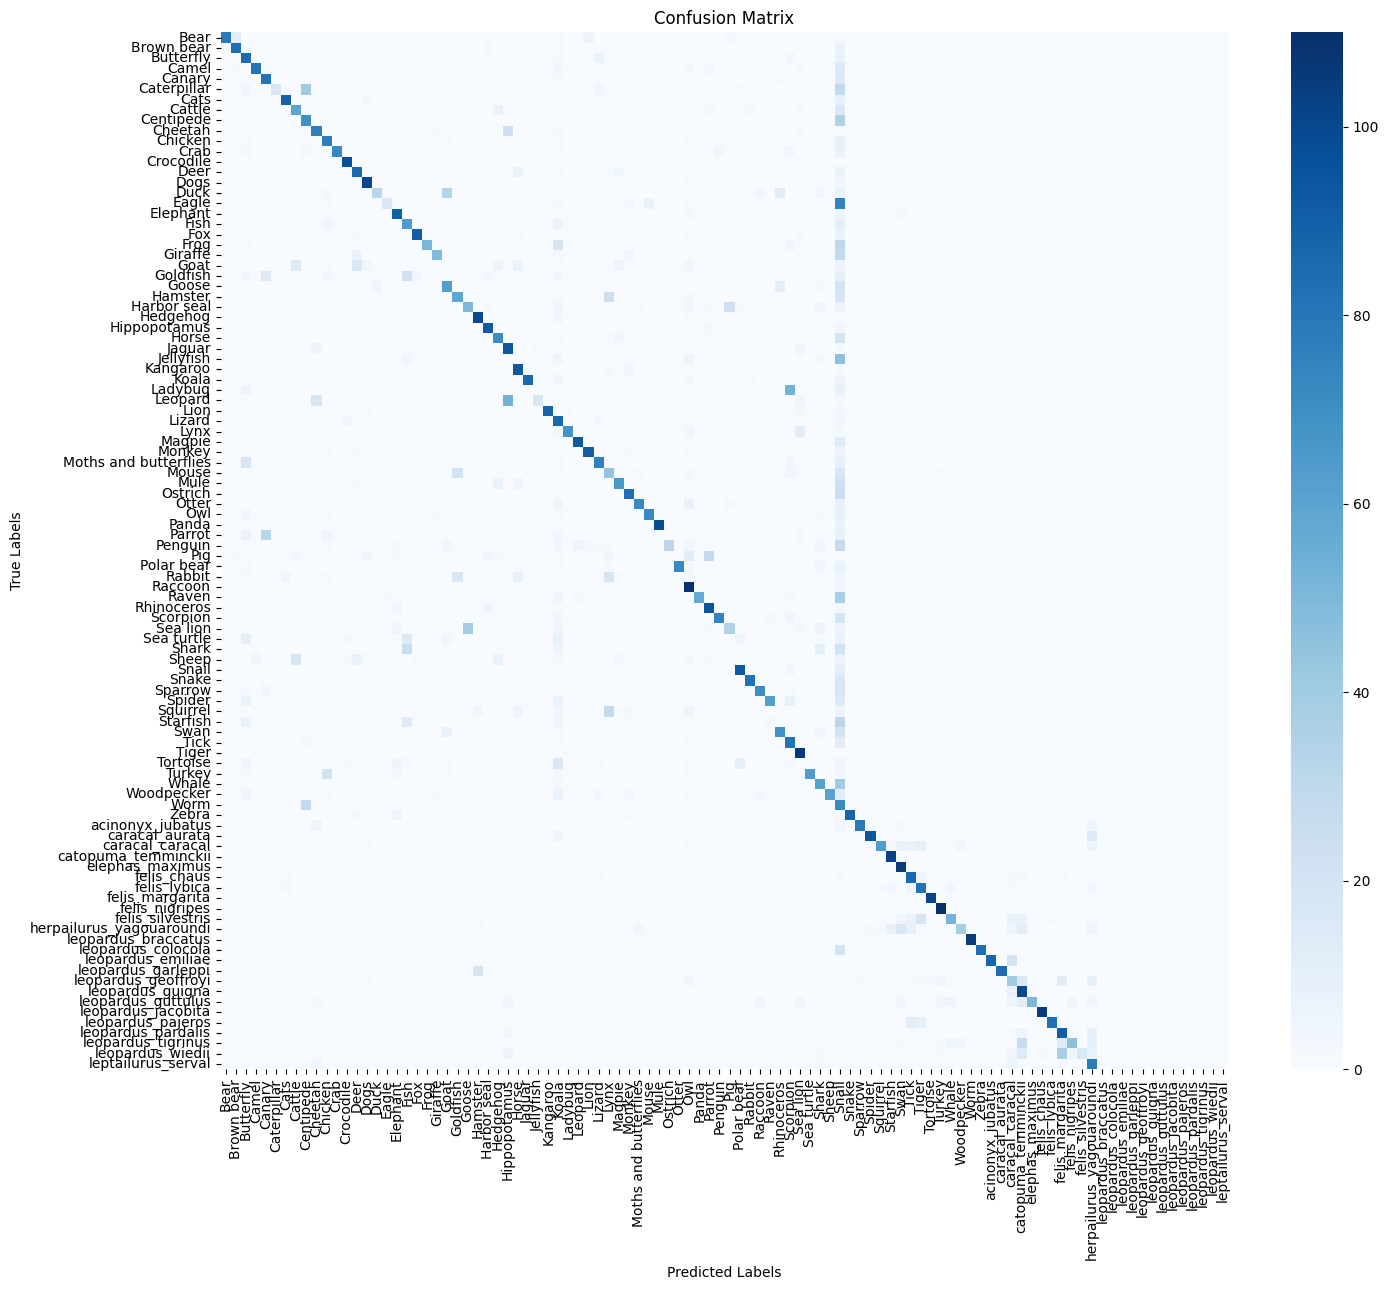

=== PER-CLASS ACCURACY ===
Bear: 0.7453 (74.53%)
Brown bear: 0.7981 (79.81%)
Butterfly: 0.7727 (77.27%)
Camel: 0.7257 (72.57%)
Canary: 0.7714 (77.14%)
Caterpillar: 0.1619 (16.19%)
Cats: 0.8396 (83.96%)
Cattle: 0.5769 (57.69%)
Centipede: 0.6330 (63.30%)
Cheetah: 0.7064 (70.64%)
Chicken: 0.7778 (77.78%)
Crab: 0.7087 (70.87%)
Crocodile: 0.9604 (96.04%)
Deer: 0.7611 (76.11%)
Dogs: 0.9266 (92.66%)
Duck: 0.3019 (30.19%)
Eagle: 0.1441 (14.41%)
Elephant: 0.8738 (87.38%)
Fish: 0.6095 (60.95%)
Fox: 0.8426 (84.26%)
Frog: 0.4554 (45.54%)
Giraffe: 0.4579 (45.79%)
Goat: 0.0141 (1.41%)
Goldfish: 0.0137 (1.37%)
Goose: 0.0000 (0.00%)
Hamster: 0.0000 (0.00%)
Harbor seal: 0.0190 (1.90%)
Hedgehog: 0.0000 (0.00%)
Hippopotamus: 0.0000 (0.00%)
Horse: 0.0000 (0.00%)
Jaguar: 0.0000 (0.00%)
Jellyfish: 0.0000 (0.00%)
Kangaroo: 0.0000 (0.00%)
Koala: 0.0490 (4.90%)
Ladybug: 0.0000 (0.00%)
Leopard: 0.0000 (0.00%)
Lion: 0.0094 (0.94%)
Lizard: 0.0283 (2.83%)
Lynx: 0.0000 (0.00%)
Magpie: 0.0000 (0.00%)
Monkey: 0.0179 

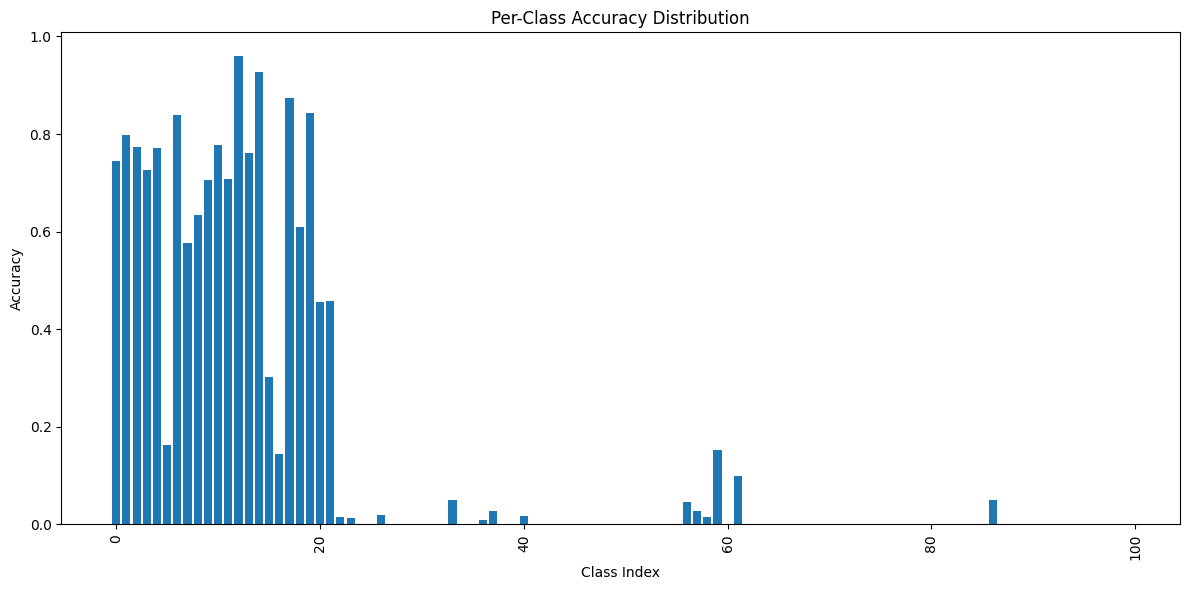

In [9]:
# Install sklearn if not already installed
%pip install seaborn
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load your best model
model = models.resnet101(pretrained=False)
num_classes = 87  # Update if different
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("best_resnet101NEW.pth", map_location=device))
model = model.to(device)
model.eval()

# Load test data (use the same transform as your validation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_data = datasets.ImageFolder(r"D:\Downloads\Split_dataset\test", transform=test_transform)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

# Get class names
class_names = test_data.classes

# Evaluation
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Calculate metrics
accuracy = np.mean(all_preds == all_labels)
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print("=== OVERALL METRICS ===")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Macro Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Macro Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"Macro F1-Score: {f1:.4f} ({f1*100:.2f}%)")
print("\n")

# Classification report
print("=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(all_labels, all_preds, target_names=class_names, zero_division=0))

# Confusion matrix
plt.figure(figsize=(15, 13))
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class accuracy
class_correct = np.zeros(len(class_names))
class_total = np.zeros(len(class_names))

for i in range(len(all_labels)):
    class_idx = all_labels[i]
    class_total[class_idx] += 1
    if all_labels[i] == all_preds[i]:
        class_correct[class_idx] += 1

class_accuracy = class_correct / class_total

print("=== PER-CLASS ACCURACY ===")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {class_accuracy[i]:.4f} ({class_accuracy[i]*100:.2f}%)")

# Plot class accuracy distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(class_names)), class_accuracy)
plt.xlabel('Class Index')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Selected Classes: ['Sheep', 'Cats', 'leopardus_colocola', 'Hamster', 'leopardus_wiedii', 'Jaguar']


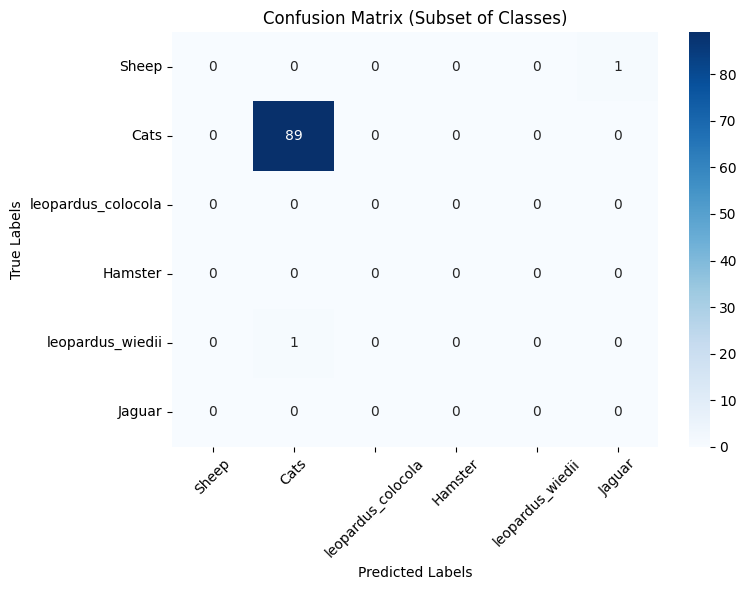

In [10]:
import random

# Pick 6 random classes (or manually specify)
selected_classes = random.sample(class_names, 6)
print("Selected Classes:", selected_classes)

# Get their indices
selected_indices = [class_names.index(c) for c in selected_classes]

# Mask for samples where TRUE label belongs to selected classes
mask = np.isin(all_labels, selected_indices)

# Apply mask to both labels and preds
filtered_labels = all_labels[mask]
filtered_preds = all_preds[mask]

# Also drop predictions outside selected_indices
valid_mask = np.isin(filtered_preds, selected_indices)
filtered_labels = filtered_labels[valid_mask]
filtered_preds = filtered_preds[valid_mask]

# Remap indices to 0...len(selected_classes)-1
mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(selected_indices)}
filtered_labels = np.array([mapping[l] for l in filtered_labels])
filtered_preds = np.array([mapping[p] for p in filtered_preds])

# Confusion matrix for selected classes
cm_small = confusion_matrix(filtered_labels, filtered_preds, labels=range(len(selected_classes)))

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_small, annot=True, fmt='d', cmap='Blues',
            xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Subset of Classes)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Using device: cpu


c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


=== OVERALL METRICS ===
Test Accuracy: 0.1571 (15.71%)
Macro Precision: 0.1660 (16.60%)
Macro Recall: 0.1509 (15.09%)
Macro F1-Score: 0.1483 (14.83%)


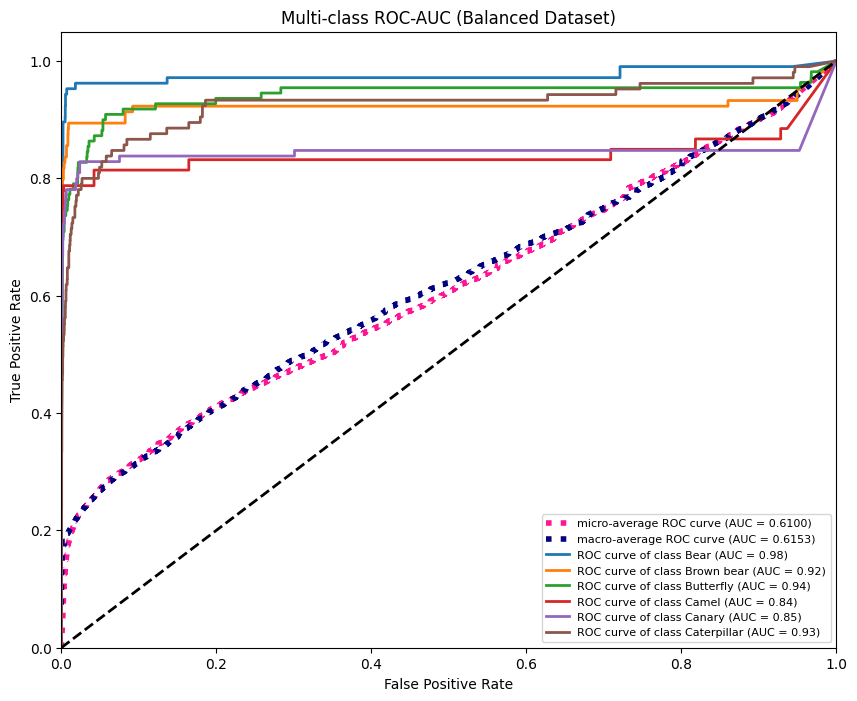

In [11]:
#ROC-AUC for Multi-class Classification(Balanced Dataset)
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc
)
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.preprocessing import label_binarize

# ================================
# Device
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ================================
# Load trained model
# ================================
model = models.resnet101(pretrained=False)
num_classes = 87   # Balanced dataset classes
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("best_resnet101.pth", map_location=device))
model = model.to(device)
model.eval()

# ================================
# Load test data
# ================================
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_data = datasets.ImageFolder(
    r"D:\Downloads\Split_dataset\test",
    transform=test_transform
)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

class_names = test_data.classes

# ================================
# Predictions
# ================================
all_preds, all_labels, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# ================================
# Metrics
# ================================
accuracy = np.mean(all_preds == all_labels)
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print("=== OVERALL METRICS ===")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Macro Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Macro Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"Macro F1-Score: {f1:.4f} ({f1*100:.2f}%)")

# ================================
# ROC-AUC
# ================================
# Binarize labels
y_true_bin = label_binarize(all_labels, classes=list(range(num_classes)))

# Compute ROC curve and ROC area
fpr, tpr, roc_auc = {}, {}, {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro and macro average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), all_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# ================================
# Plot ROC-AUC
# ================================
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (AUC = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (AUC = {roc_auc["macro"]:.4f})',
         color='navy', linestyle=':', linewidth=4)

# Plot a few selected classes
for i in range(min(6, num_classes)):  # avoid plotting all 87 classes
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC-AUC (Balanced Dataset)')
plt.legend(loc="lower right", fontsize=8)
plt.show()
